In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from scipy.optimize import curve_fit

In [52]:
import math

In [5]:
!mkdir dataset
!wget "https://raw.githubusercontent.com/CulenS/Solar-Dataset/main/Solar%20Data%20Sheet_2.csv" -O dataset/SolarSheet2.csv

mkdir: cannot create directory ‘dataset’: File exists
--2024-05-18 20:47:19--  https://raw.githubusercontent.com/CulenS/Solar-Dataset/main/Solar%20Data%20Sheet_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 433650 (423K) [text/plain]
Saving to: ‘dataset/SolarSheet2.csv’

dataset/SolarSheet2 100%[===================>] 423.49K  --.-KB/s    in 0.05s   

2024-05-18 20:47:19 (9.03 MB/s) - ‘dataset/SolarSheet2.csv’ saved [433650/433650]



In [6]:
df = pd.read_csv('/content/dataset/SolarSheet2.csv')
df.head()

,Clearness,GHI,Solar Angle,sin(b),Y,X
0,0.49,380.406172,43.59,0.689493,7.026388,1.450341
1,0.46,357.115998,43.59,0.689493,7.026388,1.450341
2,0.52,403.696346,43.59,0.689493,7.026388,1.450341
3,0.54,419.223128,43.59,0.689493,7.026388,1.450341
4,0.51,395.932955,43.59,0.689493,7.026388,1.450341


In [7]:
# EQ:
# Y = A' - B*X + ln(C*X + 1)
# Y = lnA - B*X + ln(C*X + 1)

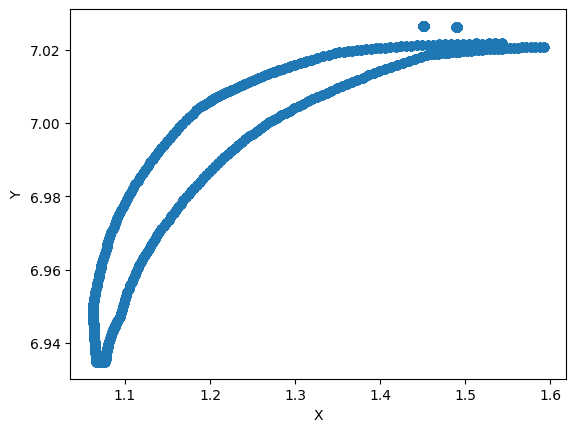

In [21]:
plt.scatter(df['X'], df['Y'])

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [26]:
def func(x, A1, B, C):
  return A1 - B*x + np.log(C*(x-2) + 1)

In [23]:
X = df['X']
Y = df['Y']

In [27]:
popt, pcov = curve_fit(func, X, Y,  p0=[6.933, -0.01, 1.95])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


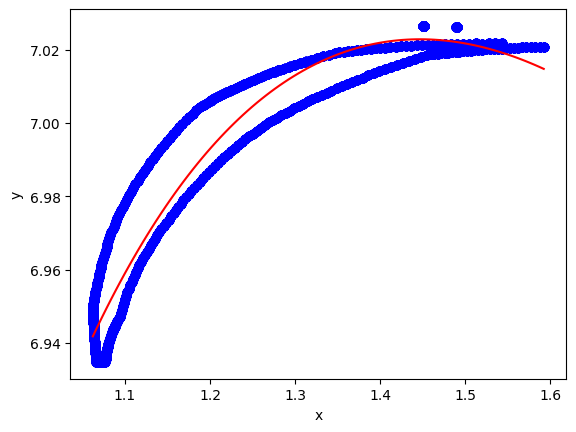

In [54]:
popt, pcov = curve_fit(func, X, Y)

A1opt, Bopt, Copt = popt

Xx = np.linspace(min(X), max(X), 100)
Yy = func(Xx, A1opt, Bopt, Copt)

plt.plot(Xx, Yy, color='red', label='optimal')
plt.scatter(X, Y, color='blue', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [56]:
print('The obtained equation is :')
print('y =', A1opt, '-', Bopt, '*x + ln(', Copt, '*x + 1)')
Aopt = math.exp(A1opt)
print('y = ln', Aopt, '-', Bopt, '*x + ln(', Copt, '*x + 1)')

The obtained equation is :
y = 8.749324183745099 - 0.9112290610898717 *x + ln( 0.6058061208717839 *x + 1)
y = ln 6306.4246832941235 - 0.9112290610898717 *x + ln( 0.6058061208717839 *x + 1)
